In [1]:
import pandas as pd
import numpy as np

Load data into dataframe

In [2]:
features_data = pd.read_csv('Features data set.csv', sep = ",")
stores_data = pd.read_csv('stores data-set.csv',sep=',')
sales_data = pd.read_csv('sales data-set.csv',sep = ',')

In [3]:
display(features_data.head())
display(stores_data.head())
display(sales_data.head())

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
merged_sales_feature = pd.merge(features_data, sales_data, how='right', on = ['Store','Date','IsHoliday'])
final_data = pd.merge(stores_data,merged_sales_feature, how='right', on = 'Store')
final_data.shape

(421570, 16)

Convert date object into datetime64 for comparison in the future

In [5]:
final_data['Date']=pd.to_datetime(final_data['Date'],format = '%d/%m/%Y',yearfirst = True)
final_data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


Create new dataframe called store_time_grouped for time-series analysis

In [7]:
store_time_grouped=final_data.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index(name='Total_Weekly_Sales')
store_time_grouped.sort_values(by = ['Store', 'Date'])
store_time_grouped.head(5)

,Store,Date,Total_Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


Extract Store 1 as an example to perform time-series analysis

In [8]:
Store_1= store_time_grouped[store_time_grouped['Store']==1][['Date','Total_Weekly_Sales']]
Store_1.head()

,Date,Total_Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


/Users/K21G/anaconda3/envs/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


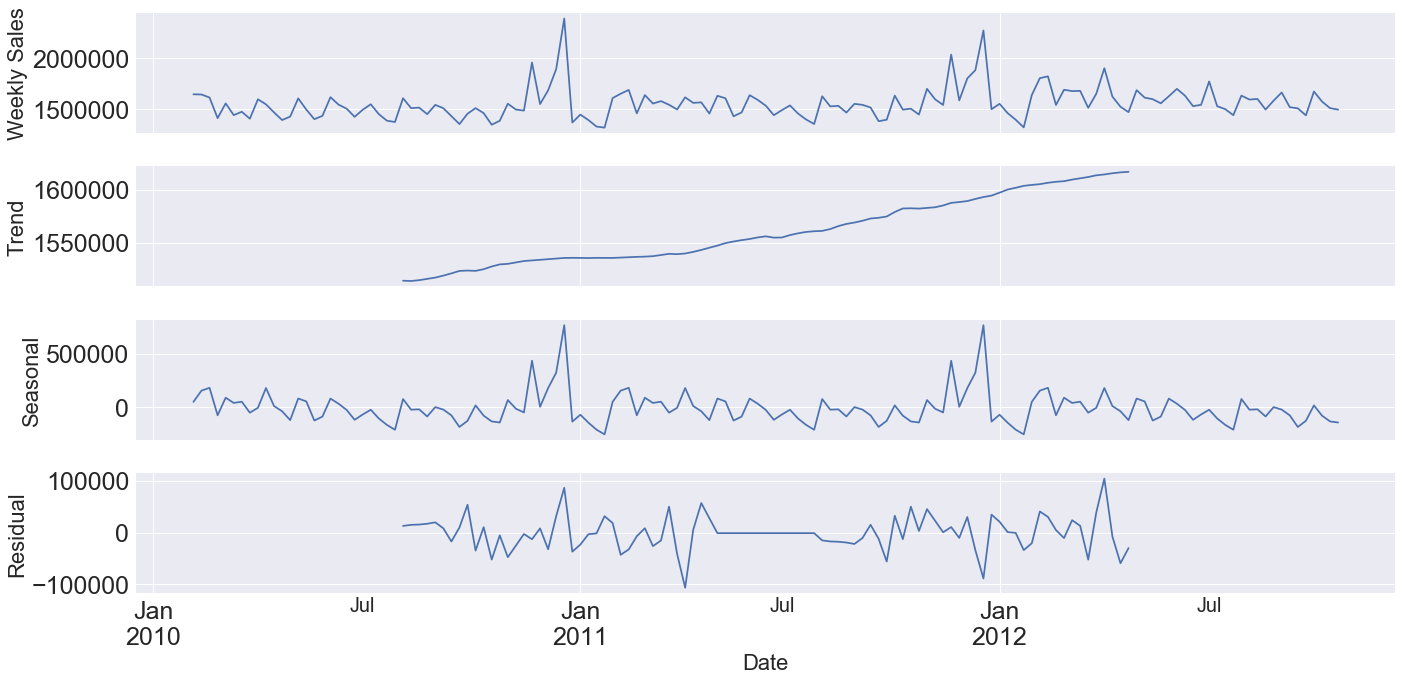

In [9]:
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn;seaborn.set()
seaborn.set(font_scale=2)
Store_1_ts = pd.Series(data=Store_1['Total_Weekly_Sales'].values, index = Store_1['Date'])
#Store_1_ts.plot(label = 'Time-series plot of Store 1')
#plt.ylabel('Weekly Sales')
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20,10))
result = seasonal_decompose(Store_1_ts, model='additive')
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Weekly Sales')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')
for i in range(4):
    axes[i].tick_params(axis='both', labelsize=25)
    axes[i]
plt.tight_layout()
plt.show()


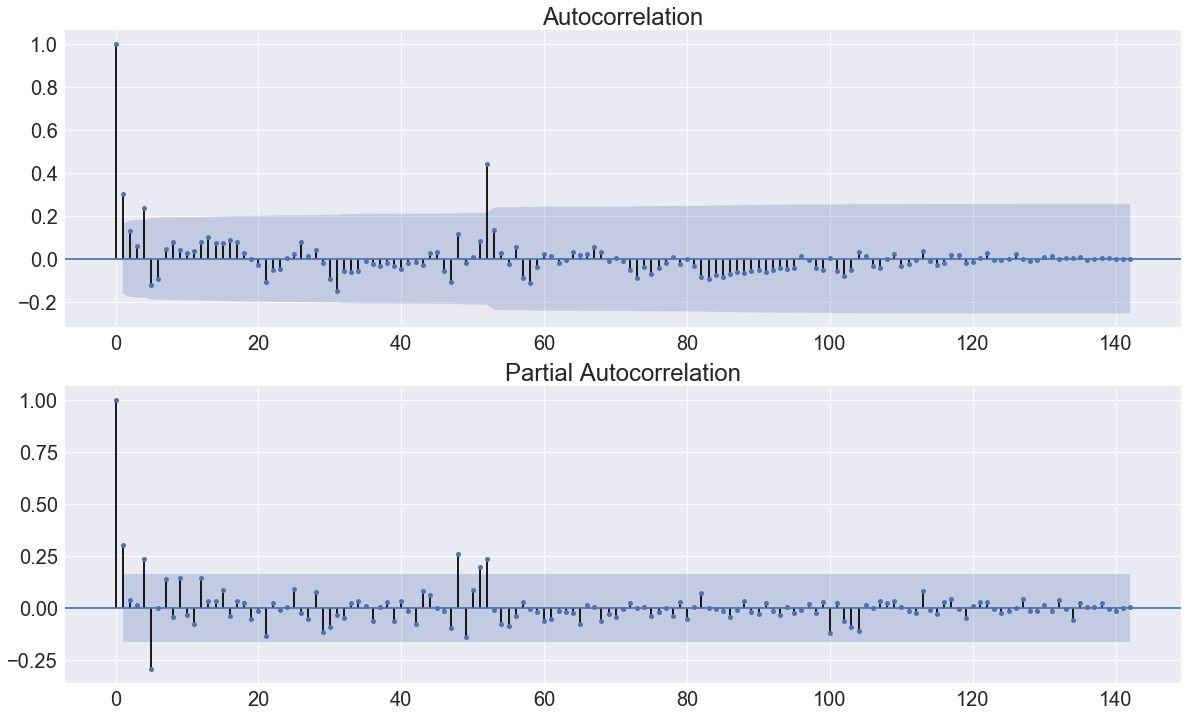

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(20,12))
plt.subplot(211)
plot_acf(Store_1_ts, ax=plt.gca())
plt.subplot(212)
plot_pacf(Store_1_ts, ax=plt.gca())
plt.show()

Iterate through all combinations with order between 0 to 3

In [11]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 4)
d=range(1,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]


In [12]:
import statsmodels.api as sm
parameters ={}
for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
            mod = sm.tsa.statespace.SARIMAX(Store_1_ts[:'2012-07-27'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
            parameters[results.aic] = [param,param_seasonal]
        except:
            continue

ARIMA(0, 1, 0)x(1, 1, 0, 52)52 - AIC:651.300708462
ARIMA(0, 1, 1)x(0, 1, 0, 52)52 - AIC:1902.0237372
ARIMA(0, 1, 1)x(1, 1, 0, 52)52 - AIC:638.735393501
ARIMA(0, 1, 2)x(0, 1, 0, 52)52 - AIC:1884.97665666
ARIMA(0, 1, 2)x(1, 1, 0, 52)52 - AIC:640.829182974
ARIMA(0, 1, 3)x(0, 1, 0, 52)52 - AIC:1840.412138
ARIMA(0, 1, 3)x(1, 1, 0, 52)52 - AIC:633.564192551
ARIMA(1, 1, 0)x(0, 1, 0, 52)52 - AIC:1941.66147536
ARIMA(1, 1, 0)x(1, 1, 0, 52)52 - AIC:624.291840932
ARIMA(1, 1, 1)x(0, 1, 0, 52)52 - AIC:1918.73005816
ARIMA(1, 1, 1)x(1, 1, 0, 52)52 - AIC:615.913229032
ARIMA(1, 1, 2)x(0, 1, 0, 52)52 - AIC:1879.28433209
ARIMA(1, 1, 2)x(1, 1, 0, 52)52 - AIC:617.024450678
ARIMA(1, 1, 3)x(0, 1, 0, 52)52 - AIC:1842.42436977
ARIMA(1, 1, 3)x(1, 1, 0, 52)52 - AIC:612.053180001
ARIMA(2, 1, 0)x(0, 1, 0, 52)52 - AIC:1904.06771539
ARIMA(2, 1, 0)x(1, 1, 0, 52)52 - AIC:593.611200944
ARIMA(2, 1, 1)x(0, 1, 0, 52)52 - AIC:1900.03515987
ARIMA(2, 1, 1)x(1, 1, 0, 52)52 - AIC:589.01623939
ARIMA(2, 1, 2)x(0, 1, 0, 52)52 - AI

Display the optimal orders

In [13]:
parameters[min(parameters)]

[(3, 1, 0), (1, 1, 0, 52)]

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8391      0.254     -3.304      0.001      -1.337      -0.341
ar.L2         -0.7568      0.162     -4.677      0.000      -1.074      -0.440
ar.L3         -0.5182      0.144     -3.600      0.000      -0.800      -0.236
ar.S.L52      -0.7230      0.323     -2.238      0.025      -1.356      -0.090
sigma2      5.173e+09   2.83e-11   1.82e+20      0.000    5.17e+09    5.17e+09


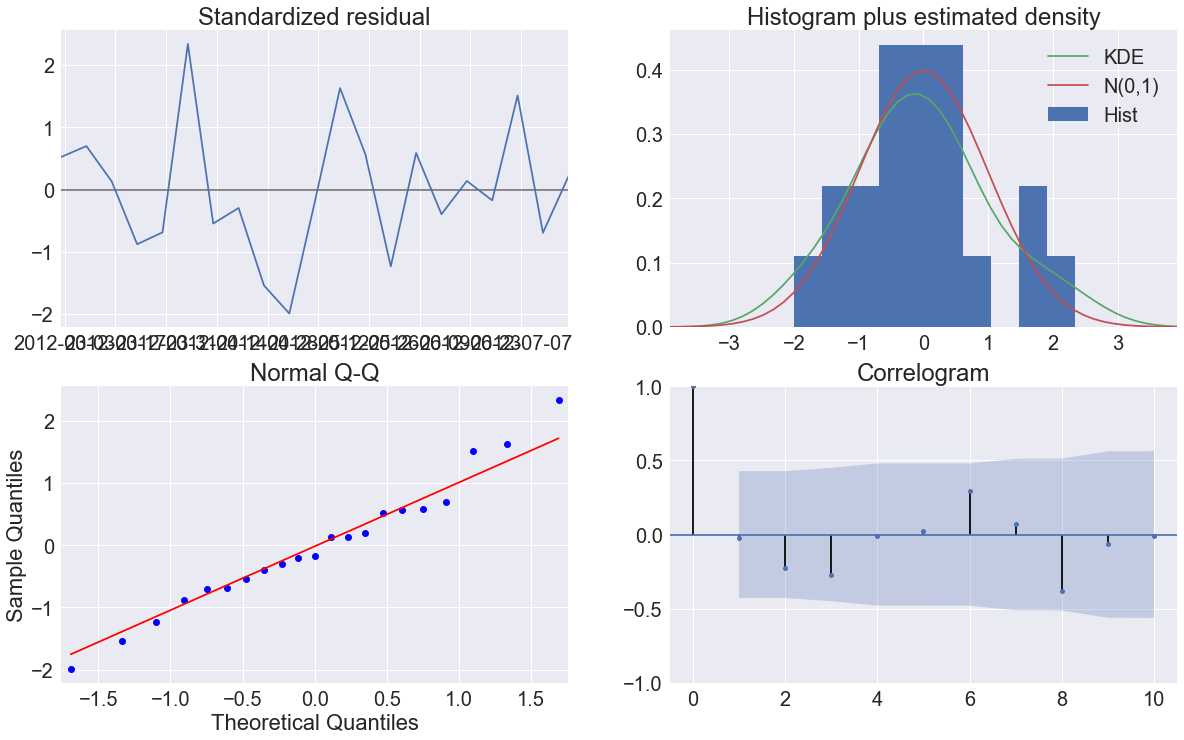

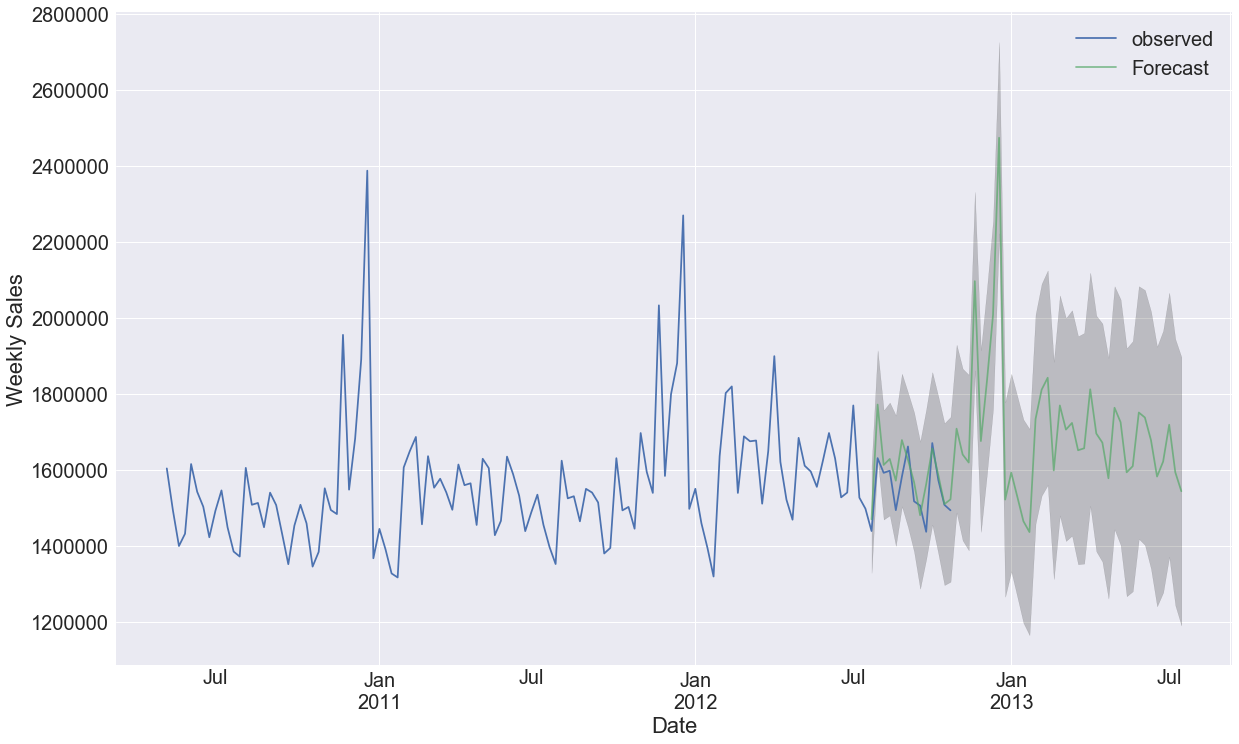

In [18]:
mod = sm.tsa.statespace.SARIMAX(Store_1_ts[:'2012-07-20'],
                                            order=(3,1,0),
                                            seasonal_order=(1,1,0,52),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(20, 12))
plt.show()

pred_fc = results.get_forecast(steps=52)
pred_ci = pred_fc.conf_int()
ax = Store_1_ts['2010-05-02':].plot(label='observed')
pred_fc.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7,figsize=(20,12))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.legend()
plt.show()

## Try using machine learning to predict the future sales

In [19]:
Feature_Map_sales = final_data[['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2',\
                               'MarkDown3','MarkDown4','MarkDown5','CPI', 'Unemployment','IsHoliday',\
                                'Dept']]

In [20]:
def plot_corr(df,size=10):
    seaborn.set(font_scale=2)
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.grid(False)
    ax.set_aspect("equal")
    seaborn.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,vmin=-1, vmax=1)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

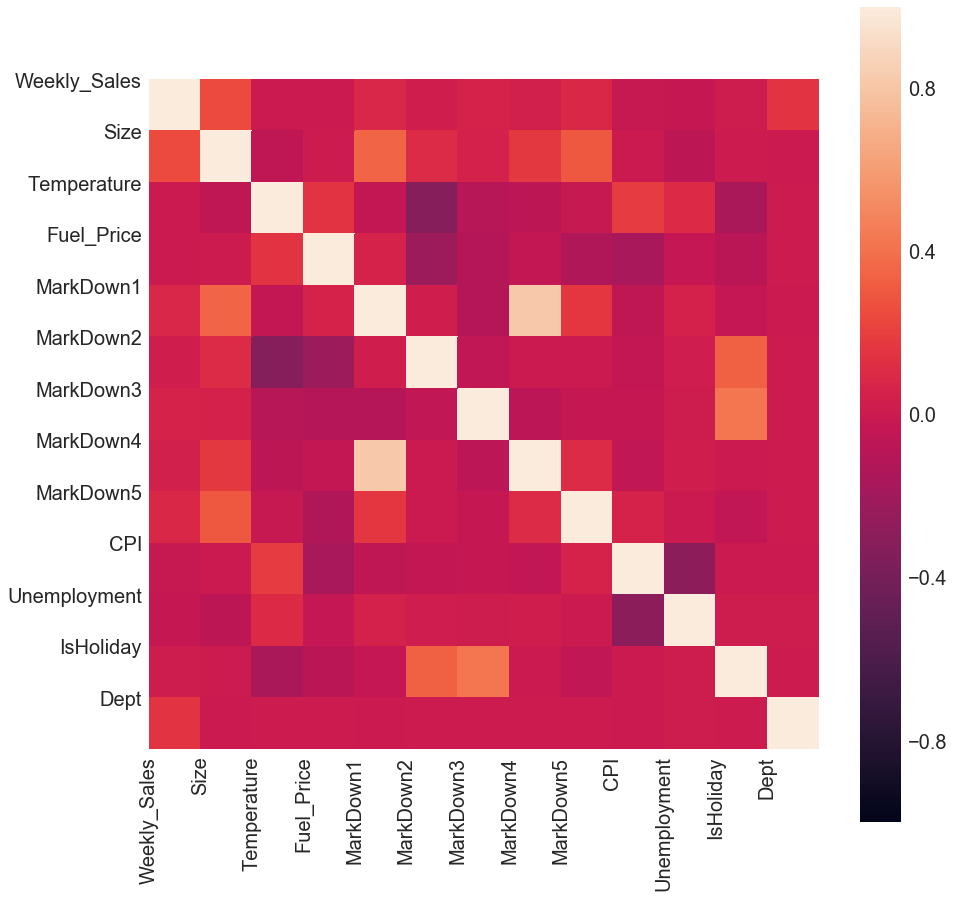

In [21]:
plot_corr(Feature_Map_sales,size=15)

In [22]:
final_data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


# Try linear regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.33, random_state=42)

In [89]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
print 'R square:',accuracy

R square: 0.08507190516072616


The results with Linear model is terribly bad, let's try applying regularization

In [90]:
lr_reg = linear_model.RidgeCV(alphas=[0.1])
#lr_reg = linear_model.Ridge(alpha = 1000000)
lr_reg.fit(X_train, y_train)
accuracy = lr_reg.score(X_test, y_test)
print 'R square:',accuracy
#print lr_reg.cv_values_
#print lr_reg.alpha_

R square: 0.08507190450201185


Linear regression terribly fit the data, mainly due to the catagorical features exist which hampers the model accuracy.

# Try decision trees algorithm

In [30]:
ml_data_2 = final_data.copy()
x = ml_data_2.groupby(['Store','Date']).agg({'Type':'first',
                                            'Size':'first',
                                            'Temperature':'first',
                                            'Fuel_Price':'first',
                                            'MarkDown1':'first',
                                            'MarkDown2':'first',
                                            'MarkDown3':'first',
                                            'MarkDown4':'first',
                                            'MarkDown5':'first',
                                            'CPI':'first',
                                            'Unemployment':'first',
                                            'IsHoliday':'first',
                                            'Weekly_Sales':'sum'}).reset_index()
x['Type'] = x['Type'].map(lambda x: 1 if x=='A' else 2 if x=='B' else 3 if x=='C' else 0)
x[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]=x[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
x.head(50)
y = x['Weekly_Sales']
x = x.drop(columns = ['Date', 'Store','Weekly_Sales'])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor
learn_cv = pd.Series()
for dp in range(1,31,2):
    regr = RandomForestRegressor(max_depth=dp)
    regr.fit(X_train, y_train)
    accuracy = regr.score(X_test, y_test)
    print ("Max tree depth:{}, R square:{}".format(dp,accuracy))
    learn_cv.set_value(dp,accuracy)

Max tree depth:1, R square:0.492188707758
Max tree depth:3, R square:0.726151421424
Max tree depth:5, R square:0.875385189841


/Users/K21G/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Max tree depth:7, R square:0.916035189018
Max tree depth:9, R square:0.931212748657
Max tree depth:11, R square:0.937744494395
Max tree depth:13, R square:0.938798818271
Max tree depth:15, R square:0.939798351497
Max tree depth:17, R square:0.939514991297
Max tree depth:19, R square:0.938396177501
Max tree depth:21, R square:0.941998189257
Max tree depth:23, R square:0.939549581345
Max tree depth:25, R square:0.939644362336
Max tree depth:27, R square:0.939365367428
Max tree depth:29, R square:0.937049742366


Text(0,0.5,'R square')

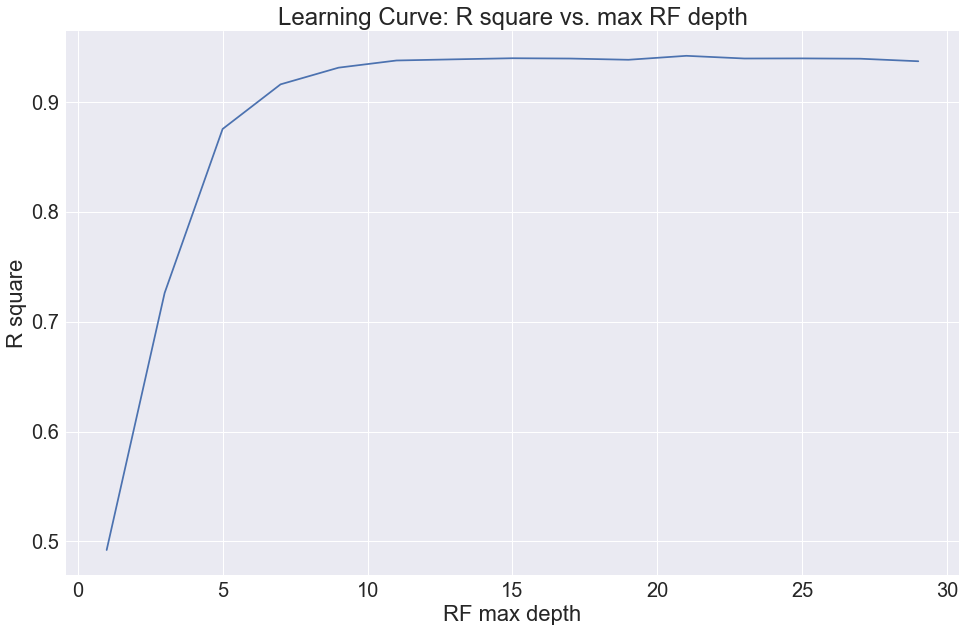

In [40]:
ax = learn_cv.plot(label = 'R square',title = 'Learning Curve: R square vs. max RF depth',figsize=(16,10))
ax.set_xlabel("RF max depth")
ax.set_ylabel("R square")

In [42]:
regr = RandomForestRegressor(max_depth=21)
regr.fit(X_train, y_train)
feature_impt = pd.Series(regr.feature_importances_, index = x.columns)
display(feature_impt.sort_values(ascending=False))

Size            0.800712
CPI             0.067224
Unemployment    0.058412
MarkDown3       0.020852
Temperature     0.015410
Fuel_Price      0.014550
Type            0.012455
MarkDown4       0.004486
MarkDown5       0.001875
IsHoliday       0.001749
MarkDown1       0.001169
MarkDown2       0.001107
dtype: float64